# Hackaton - Equipe 5

Notebook criado para explorar os dados para desenvolver a tecnologia de agrupamento utilizando a abordagem de aprendizagem não supervisionada.

In [1]:
#carregando os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium
%matplotlib inline

In [89]:
#lendo os dados
df = pd.read_csv('C:/Users/Samsung/Documents/hackaton/hack_data.csv')

In [90]:
#plotar datatipe
df.dtypes

Timestamp                   object
nome                        object
endereco                    object
networking                   int64
abacate                      int64
musica                      object
assuntos                    object
Eletronica                   int64
Indie                        int64
Mpb                          int64
Rock                         int64
Vaporwave                    int64
Indie rock                   int64
Forro                        int64
Jazz                         int64
Maracatu                     int64
Funk                         int64
Pagode                       int64
Rap nacional                 int64
Samba                        int64
Blues                        int64
Country                      int64
Dance                        int64
Disco                        int64
Hardcore                     int64
Hip hop                      int64
Metal                        int64
Nightcore                    int64
Pop rock            

In [111]:
#plotar colunas
df.columns

Index(['Timestamp', 'nome', 'endereco', 'networking', 'abacate', 'musica',
       'assuntos', 'Eletronica', 'Indie', 'Mpb', 'Rock', 'Vaporwave',
       'Indie rock', 'Forro', 'Jazz', 'Maracatu', 'Funk', 'Pagode',
       'Rap nacional', 'Samba', 'Blues', 'Country', 'Dance', 'Disco',
       'Hardcore', 'Hip hop', 'Metal', 'Nightcore', 'Pop rock', 'Punk',
       'Reggae', 'Sertanejo', 'Sertanejo universitario', 'Forro.1', 'Rnb',
       'K-pop', 'Arte', 'Ciencia', 'Economia', 'Filmes e Series', 'Historia',
       'Noticias', 'Politica', 'Tecnologia', 'Animais', 'Esportes',
       'Gastronomia', 'Sustentabilidade', 'Trabalho', 'Natureza', 'Fofocas',
       'Moda', 'Famosos', 'Lat', 'Lng', 'endereco.1'],
      dtype='object')

In [118]:
#Criando o modelo de aprendizagem não supervisionada
from sklearn.cluster import KMeans

In [119]:
#Algoritmo K-means com k= 8
km = KMeans()

In [120]:
x = df[['Lat','Lng']]
km.fit(x, 8)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
df['cluster'] = km.predict(x)
x['cluster'] = km.predict(x)

C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [122]:
x.head(5)

,Lat,Lng,cluster
0,-19.933164,-43.969129,0
1,-19.862421,-43.998188,2
2,-19.975593,-43.968260,0
3,-19.929345,-43.943810,3
4,-19.888585,-43.947986,6


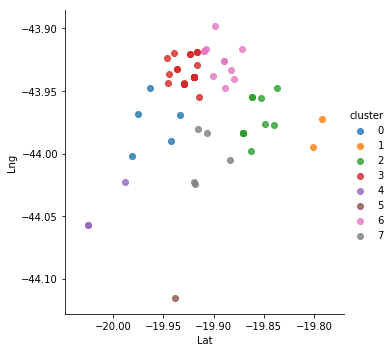

In [123]:
ax = sns.lmplot(x = 'Lat', y = 'Lng', hue = 'cluster', data = x, fit_reg= False)
#Grafico que 

In [125]:
#Criando o cluster com variavel : Preferencia por abacate ou batata frita
x = df[['Lat', 'Lng', 'abacate']]
km.fit(x, 8)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [126]:
#Criando o cluster com variavel : Preferencia por abacate ou batata frita
df['cluster_abacate'] = km.predict(x)
x['cluster_abacate'] = km.predict(x)

C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


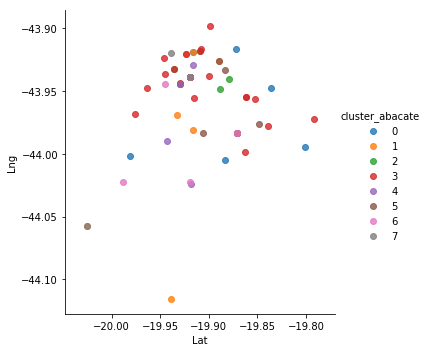

In [127]:
#Criando o cluster com variavel : Preferencia por abacate ou batata frita
sns.lmplot(x = 'Lat', y = 'Lng', hue = 'cluster_abacate', data = x, fit_reg= False)

In [130]:
#Criando o cluster com variavel : Preferencia por Brindes ou Networking
x = df[['Lat', 'Lng', 'networking']]
km.fit(x,8)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [131]:
df['cluster_networking'] = km.predict(x)
x['cluster_networking'] = km.predict(x)

C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


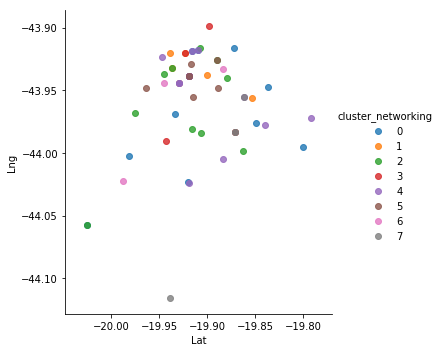

In [132]:
#Criando o cluster com variavel : Preferencia por Brindes ou Networking
sns.lmplot(x = 'Lat', y = 'Lng', hue = 'cluster_networking', data = x, fit_reg= False)

In [142]:
#criando cluster por preferencia musical
x = df[['Eletronica', 'Indie', 'Mpb', 'Rock', 'Vaporwave',
       'Indie rock', 'Forro', 'Jazz', 'Maracatu', 'Funk', 'Pagode',
       'Rap nacional', 'Samba', 'Blues', 'Country', 'Dance', 'Disco',
       'Hardcore', 'Hip hop', 'Metal', 'Nightcore', 'Pop rock', 'Punk',
       'Reggae', 'Sertanejo', 'Sertanejo universitario', 'Forro.1', 'Rnb',
       'K-pop', 'Lat', 'Lng']]
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
#Criando o cluster com variavel : Preferencia Musical
km.fit(x, 8)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [144]:
df['cluster_musica'] = km.predict(x)
x['cluster_musica'] = km.predict(x)

C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


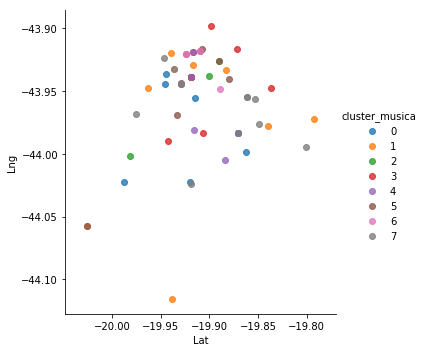

In [145]:
#Criando o cluster com variavel : Preferencia Musical
sns.lmplot(x = 'Lat', y = 'Lng', hue = 'cluster_musica', data = x, fit_reg= False)

In [151]:
#criando cluster por preferencia musical
x = df[['Arte', 'Ciencia', 'Economia', 'Filmes e Series', 'Historia',
       'Noticias', 'Politica', 'Tecnologia', 'Animais', 'Esportes',
       'Gastronomia', 'Sustentabilidade', 'Trabalho', 'Natureza', 'Fofocas',
       'Moda', 'Famosos', 'Lat', 'Lng']]

km.fit(x, 8)
df['cluster_assuntos'] = km.predict(x)
x['cluster_assuntos'] = km.predict(x)


C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


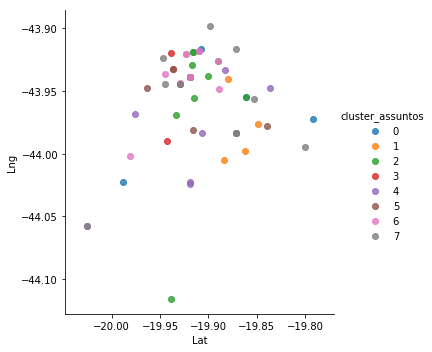

In [152]:
sns.lmplot(x = 'Lat', y = 'Lng', hue = 'cluster_assuntos', data = x, fit_reg= False)

In [159]:
#Criando cluster com todas variaveis
x = df.drop(columns = ['Timestamp', 'nome', 'endereco','musica', 'assuntos', 'endereco.1'])

In [160]:
km.fit(x, 8)
df['cluster_geral'] = km.predict(x)
x['cluster_geral'] = km.predict(x)

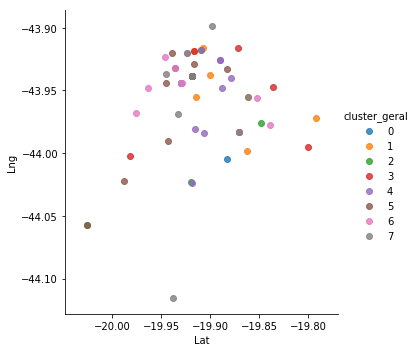

In [162]:
sns.lmplot(x = 'Lat', y = 'Lng', hue = 'cluster_geral', data = x, fit_reg= False)

In [166]:
df.to_csv('hack_data_tratado.csv')